# Pre-Trained Models in Keras

In this notebook, I will be using a series of images downloaded online with pre-trained classification models from Keras. The selected models are ResNet50 and VGG16.

- Link to ResNet50 Research Paper: https://arxiv.org/pdf/1512.03385.pdf
- Link to VGG16 Research Paper: https://arxiv.org/pdf/1409.1556.pdf

Note that these models are the award-winning models in 2014 (VGG16) and 2015 (ResNet50) on ImageNet Challenge. 

An overview of the two models can be found here: https://medium.com/@socjon/tba-920219647404

# Import Packages

In [14]:
# Import Packages
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import resnet
from keras.applications.resnet import ResNet50
from keras.applications import vgg16
from keras.applications.vgg16 import VGG16

# Load Image with its original pixels

(1202, 1920, 3)


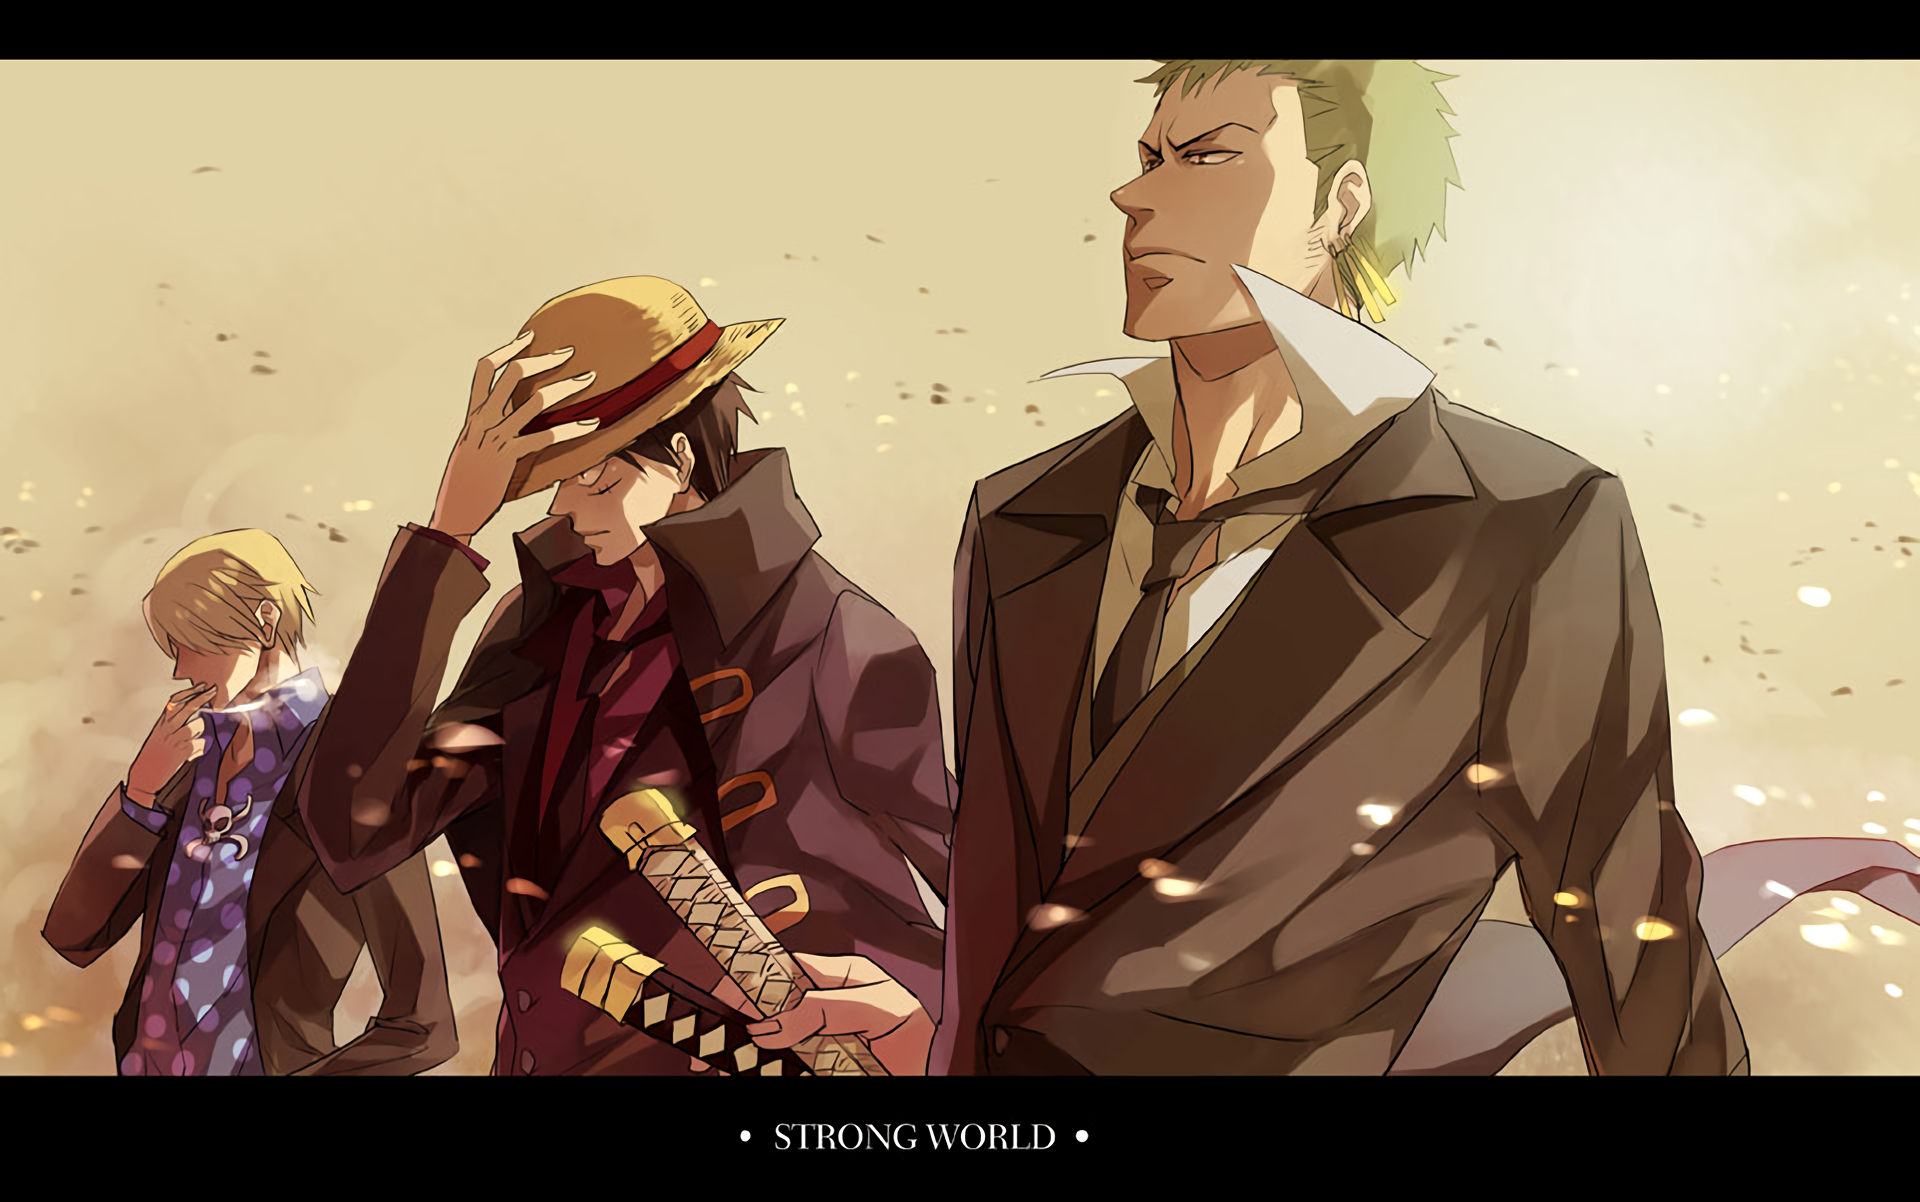

In [15]:
# Load image
banff1 = load_img('ref_image_data/3481739.png')
print (img_to_array(banff1).shape)
banff1

The original image is 2400 x 3840 pixel, so we need to resize the image to 224 x 224 pixel.

# Modify the Image

In this section, the image above will be reimported as 224 x 224 pixels. All images imported later will also be set to 224 x 224 pixels.

(224, 224, 3)


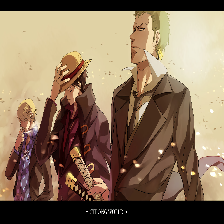

In [16]:
# Load image
banff1 = load_img('ref_image_data/3481739.png', target_size=(224,224))
print(img_to_array(banff1).shape)
banff1

# Predict the images

This section will first start with a function that will modify the image and then predict the results from ResNet50 and VGG16. The function will then be used on all the imported images to view its predicted results and the 224x224 pixels of the image. Since the pixel will scale the image, the shown images in the notebook seems to be pulled horizontally or vertically.

In [17]:
def pclasses(image):
    '''
    This function will preprocess the image before running an prediction using ResNet50.
    It will produce the top 10 predicted classes for the input image.
    '''
    # Add the forth dimension at the beginning
    new_image= np.expand_dims(image, axis=0)
    # Scale the input img to range used in the trained network
    scaled1 = resnet.preprocess_input(new_image)
    scaled2 = vgg16.preprocess_input(new_image)
    # Load the ResNet50 model
    rn50model = ResNet50()
    # load the model
    vgg16model = VGG16()
    # Run the image through the ResNet50 to make a prediction
    prediction1 = rn50model.predict(scaled1)
    prediction2 = vgg16model.predict(scaled2)
    # Search the top 5 names of the predicted classes
    predicted_classes1 = resnet.decode_predictions(prediction1, top=5)
    predicted_classes2 = vgg16.decode_predictions(prediction2, top=5)
    print("ResNet50 Prediction:")
    #Index zero is the results for the first image.
    for imagenet_id1, name1, likelihood1 in predicted_classes1[0]:
        print(" - {}: {:2f} likelihood".format(name1, likelihood1))
    print("VGG16 Prediction:")
    #Index zero is the results for the first image.
    for imagenet_id2, name2, likelihood2 in predicted_classes2[0]:
        print(" - {}: {:2f} likelihood".format(name2, likelihood2))

1/1 [==============================] - 0s 249ms/step
ResNet50 Prediction:
 - abaya: 0.861391 likelihood
 - cloak: 0.024045 likelihood
 - sax: 0.022881 likelihood
 - groom: 0.011956 likelihood
 - vestment: 0.007660 likelihood
VGG16 Prediction:
 - sax: 0.182842 likelihood
 - groom: 0.155655 likelihood
 - kimono: 0.089995 likelihood
 - stage: 0.078197 likelihood
 - suit: 0.072645 likelihood


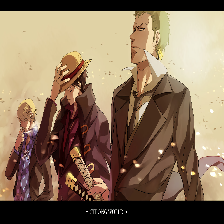

In [18]:
pclasses(banff1)
banff1

1/1 [==============================] - 0s 254ms/step
ResNet50 Prediction:
 - sports_car: 0.959099 likelihood
 - convertible: 0.030800 likelihood
 - racer: 0.004720 likelihood
 - car_wheel: 0.004122 likelihood
 - pickup: 0.000387 likelihood
VGG16 Prediction:
 - sports_car: 0.740131 likelihood
 - racer: 0.107741 likelihood
 - convertible: 0.095786 likelihood
 - car_wheel: 0.017358 likelihood
 - pickup: 0.013054 likelihood


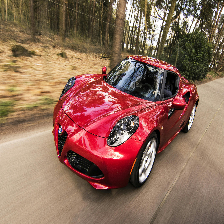

In [19]:
# Load second image
Yosemite1 = load_img('ref_image_data/car.jpg', target_size=(224,224))
pclasses(Yosemite1)
Yosemite1

1/1 [==============================] - 0s 251ms/step
ResNet50 Prediction:
 - golden_retriever: 0.484565 likelihood
 - kuvasz: 0.294509 likelihood
 - Great_Pyrenees: 0.177730 likelihood
 - Tibetan_mastiff: 0.014581 likelihood
 - Labrador_retriever: 0.011660 likelihood
VGG16 Prediction:
 - golden_retriever: 0.612287 likelihood
 - Great_Pyrenees: 0.117779 likelihood
 - kuvasz: 0.111594 likelihood
 - Tibetan_mastiff: 0.046402 likelihood
 - otterhound: 0.041257 likelihood


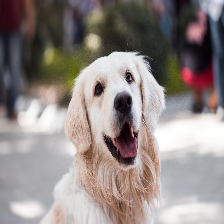

In [9]:
# Load third image
Dock1 = load_img('ref_image_data/dog.jpg', target_size=(224,224))
pclasses(Dock1)
Dock1

1/1 [==============================] - 0s 252ms/step
ResNet50 Prediction:
 - comic_book: 0.393455 likelihood
 - mask: 0.283799 likelihood
 - backpack: 0.090961 likelihood
 - ski_mask: 0.032631 likelihood
 - totem_pole: 0.029159 likelihood
VGG16 Prediction:
 - comic_book: 0.461198 likelihood
 - totem_pole: 0.081188 likelihood
 - wall_clock: 0.038067 likelihood
 - mask: 0.035075 likelihood
 - football_helmet: 0.032873 likelihood


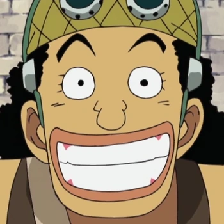

In [12]:
# Load a dog image
Dog1 = load_img('ref_image_data/Usopp_Pre_Timeskip_Portrait.webp', target_size=(224,224))
pclasses(Dog1)
Dog1

1/1 [==============================] - 0s 247ms/step
ResNet50 Prediction:
 - sports_car: 0.959099 likelihood
 - convertible: 0.030800 likelihood
 - racer: 0.004720 likelihood
 - car_wheel: 0.004122 likelihood
 - pickup: 0.000387 likelihood
VGG16 Prediction:
 - sports_car: 0.740131 likelihood
 - racer: 0.107741 likelihood
 - convertible: 0.095786 likelihood
 - car_wheel: 0.017358 likelihood
 - pickup: 0.013054 likelihood


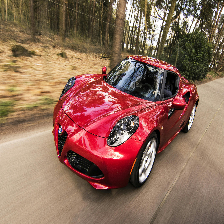

In [13]:
# Load a dog image
Dog2 = load_img('ref_image_data/car.jpg', target_size=(224,224))
pclasses(Dog2)
Dog2

# Conclusion
It is amazing to that we are now living in a century where machines can 'see' and determine what is within an image. For simple objects, the models are able to state the image accurately, thus, I decided to use some harder images while running the pre-trained models.

For the three scenery images, the models results were somewhat accurate. I was slightly confused seeing 'suspension-bridge', 'stone-wall' and 'boat-house' in the results.  However, the bottom right part of the second scenery image do have a pile of large stones and there is a boat in the third image.

It is interesting that providing a side view of German Sheppard where the image was pulled vertically before running the model can be predicted accurately. The poodle holding an item on its mouth image was predicted correctly, but VGG16 had a much lower likelihood on the image is a staandard poodle. I had then selected two cats images where the first is a black cat showing part of its face only and the second cat pretends to read with glasses. These images were hard for the models to confidently determine what they are.

1/1 [==============================] - 0s 258ms/step
ResNet50 Prediction:
 - golden_retriever: 0.484565 likelihood
 - kuvasz: 0.294509 likelihood
 - Great_Pyrenees: 0.177730 likelihood
 - Tibetan_mastiff: 0.014581 likelihood
 - Labrador_retriever: 0.011660 likelihood
VGG16 Prediction:
 - golden_retriever: 0.612287 likelihood
 - Great_Pyrenees: 0.117779 likelihood
 - kuvasz: 0.111594 likelihood
 - Tibetan_mastiff: 0.046402 likelihood
 - otterhound: 0.041257 likelihood


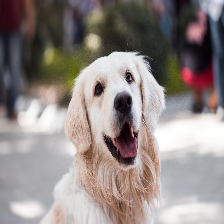

In [20]:
# Load third image
Dock1 = load_img('ref_image_data/dog.jpg', target_size=(224,224))
pclasses(Dock1)
Dock1